随机森林

In [2]:
%matplotlib inline  
# 将现在运行的整个页面都导入到这个环境里，有助于画图
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [4]:
wine = load_wine()

In [6]:
wine.data.shape

(178, 13)

In [7]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [15]:
clf = DecisionTreeClassifier(random_state=0)  # 在最重要的特征中随机选择一个特征来分支，因此每次生成的决策树都不同
rfc = RandomForestClassifier(random_state=0)  # 随机森林中的random_state生成的是一片固定的森林，而非固定的一棵树

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)

score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

print("Single Tree:{}".format(score_c)
     ,"Random Forest:{}".format(score_r))

Single Tree:0.8703703703703703 Random Forest:0.9629629629629629


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


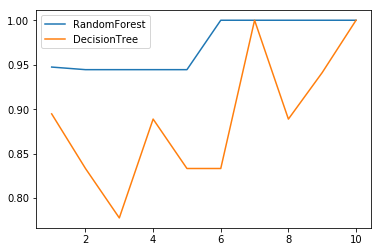

In [18]:
# 交叉验证
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label="RandomForest")
plt.plot(range(1,11),clf_s,label="DecisionTree")
plt.legend()
plt.show()

0.9888888888888889 14


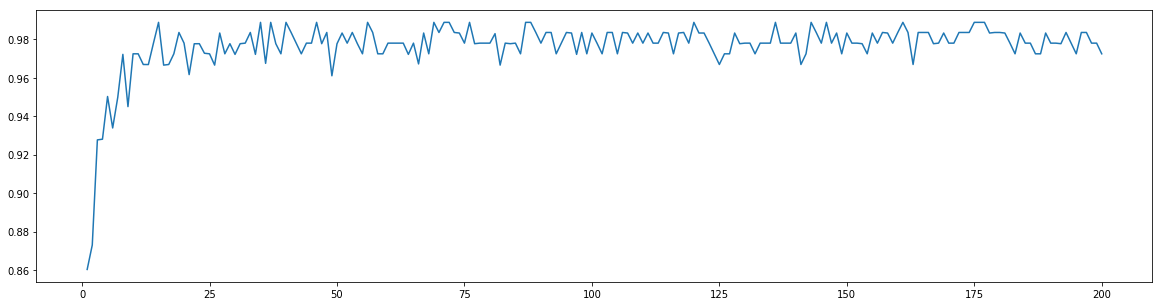

In [21]:
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

# n_jobs = -1 : 并行job个数，1=不并行，n=n个并行，-1=CPU有多少个core就启动多少个job。（用于bagging）

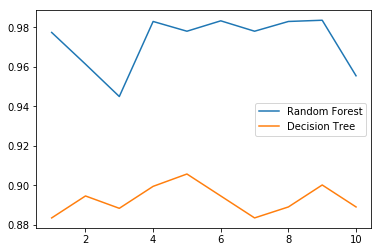

In [25]:
rfc_1 = []
clf_1 = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_1.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_1.append(clf_s)
plt.plot(range(1,11),rfc_1,label="Random Forest")
plt.plot(range(1,11),clf_1,label="Decision Tree")
plt.legend()
plt.show()

In [14]:
# 随机森林错误率
import numpy as np
from scipy.special import comb
np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()
# 判断错误率很小，所以集成算法比单个树效果好很多很多，

0.00036904803455582827

In [27]:
rfc = RandomForestClassifier(n_estimators=25,random_state=2)
rfc = rfc.fit(Xtrain,Ytrain)

In [30]:
# 随机森林中的重要属性之一，estimators_，查看森林中每一棵树的参数
rfc.estimators_[0].random_state

1872583848

In [32]:
type(rfc.estimators_[0]) # 不能放到DataFrame里面，放到里面会变成字符，不能调用其参数值得性质

sklearn.tree.tree.DecisionTreeClassifier

In [33]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state) # 其中每一棵树的random_state不会改变

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212
520265852
1366773364
125164325
786090663
578016451


In [35]:
# 在一个自助集里，样本A永远不会被抽到的概率是
# 1 - (1-1/n)^n  
# bootstrap  有放回的随机抽样

In [37]:
# 无需划分训练集和测试集
# 用带外数据来测试，需要在实例化时就将oob_score这个参数调整为True
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)

In [40]:
rfc = rfc.fit(wine.data,wine.target) # 训练时，无需再划分训练集和测试集
# 重要属性obb_score_（训练完毕后，用随机森林的另一个重要属性：oob_score_来查看我们在带外数据上的测试结果）
rfc.oob_score_

0.9719101123595506

In [1]:
# 四个参数（参数是在实例化模型时输进去用来将模型具体化的，告诉模型想要一个怎么样的随机森林）
  # n_estimators
  # random_state
  # boostrap
  # oob_score
# 两个属性（可以从随机森林中调用的一些性质，训练完毕之后的模型的一些特性）
  # .estimators_
  # oob_score_
  # feature_importances_
# 四个接口（用来调用输入测试集之后的结果的）
  # fit
  # apply
  # predict
  # score
  # predict_proba  --每个测试样本对应的被分到每个标签的概率

In [6]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain,Ytrain)

In [7]:
rfc.score(Xtest,Ytest)  # score就是对比Ytest和下面predict预测出来的精度

0.9629629629629629

In [8]:
rfc.feature_importances_ # 所有特征当中重要性的权值

array([0.13536777, 0.02483231, 0.00499344, 0.01522011, 0.01846885,
       0.08851495, 0.14127113, 0.02035025, 0.03398753, 0.12718159,
       0.14188887, 0.07739876, 0.17052443])

In [9]:
rfc.apply(Xtest) # 返回每一棵树中叶子结点的索引

array([[20, 16, 10, ..., 14, 11,  5],
       [ 1, 11,  7, ..., 13, 18, 11],
       [ 4, 11,  4, ...,  8, 11,  4],
       ...,
       [22, 18, 20, ..., 14, 18, 18],
       [ 4, 11,  4, ..., 10, 11,  4],
       [ 1,  8,  7, ...,  2,  4, 11]], dtype=int64)

In [10]:
rfc.predict(Xtest)

array([0, 2, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 0, 2, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 0, 2, 1, 2, 2, 2, 0, 1,
       0, 0, 1, 0, 2, 2, 0, 0, 1, 2])

In [1]:
# rfc.predict_proba(Xtest) # 每一个样本对应的每一类标签的概率

Bagging 多样性+弱分类器+互补 = 强分类器（单个树的错误率不能过50%）

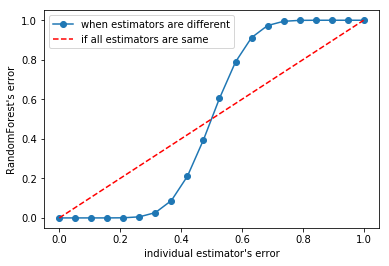

In [17]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,1,20)
y = []

for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13,26)]).sum()
    y.append(E)

plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()

RandomForestRegressor

In [18]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [19]:
boston = load_boston()

In [20]:
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
cross_val_score(regressor,boston.data,boston.target,cv=10
               ,scoring="neg_mean_squared_error")

array([-10.72900447,  -5.36049859,  -4.74614178, -20.84946337,
       -12.23497347, -17.99274635,  -6.8952756 , -93.78884428,
       -29.80411702, -15.25776814])

In [22]:
# sklearn当中的模型评估指标（打分）列表
import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

实例一（用随机森林回归填补缺失值）

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer  # 用来填补缺失值的类
from sklearn.ensemble import RandomForestRegressor

In [98]:
dataset = load_boston()

In [99]:
dataset.data.shape

(506, 13)

In [100]:
# 总共506*13=6578个数据
X_full,y_full = dataset.data,dataset.target
n_samples = X_full.shape[0]  # 506
n_features = X_full.shape[1]  # 13

In [101]:
# 首先确定我们希望放入的缺失值的比例，在这里我们假设是50%，那总共就要有3289个数据缺失

rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))
# np.floor向下取整，返回.0格式的浮点数

In [6]:
n_missing_samples

3289

In [102]:
# 所有数据要随机遍布在数据集的各行各列中，而一个缺失的数据会需要一个行索引和一个列索引
# 如果能够创造一个数组，包含3289个分布在0-506中间的行索引，和3289个分布在0-13之间的列索引
# 那我们就可以利用索引来为数据中任意3289个位置赋空值
# 然后我们用0，均值、和随机森林来填写这些缺失值，然后查看回归的结果如何

missing_features = rng.randint(0,n_features,n_missing_samples)
missing_samples = rng.randint(0,n_samples,n_missing_samples)

# missing_samples = rng.choice(n_samples,n_missing_samples,replace=False)
# 我们现在采样了3289个数据，远远超过我们的样本量506，所以我们使用随机抽取的函数randint。但如果
# 我们需要的数据量小于我们的样本506，那我们可以采用np.random.choice来抽样，choice会随机抽取不重复的随机数
# 因此可以帮助我们让数据更加分散，确保数据不会集中在一些行中
# replace = False --表示请不要重复

In [103]:
X_missing = X_full.copy() # 特征可以空
y_missing = y_full.copy() # 标签不能空

In [104]:
X_missing[missing_samples,missing_features] = np.nan

In [37]:
X_missing

array([[       nan, 1.8000e+01,        nan, ...,        nan,        nan,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00,        nan, ...,        nan, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02,        nan, 7.0700e+00, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan, 1.1930e+01, ..., 2.1000e+01,        nan,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ...,        nan, 3.9690e+02,
        7.8800e+00]])

In [105]:
X_missing = pd.DataFrame(X_missing)
# 转化为DataFrame是为了后续方便各种操作，numpy对矩阵的运算速度快到了拯救人生，
# 但是在索引等功能上却不如pandas来得要好

In [41]:
# X_missing

In [106]:
# 使用均值进行填补
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean') # 实例化
X_missing_mean = imp_mean.fit_transform(X_missing) # 训练fit+导出predict>>>特殊接口 fit_transform

In [49]:
# pd.DataFrame(X_missing_mean).isnull().sum()  # isnull()--只能在DataFrame里面进行

# 布尔值False = 0，True = 1

In [107]:
# 使用0进行填补
imp_0 = SimpleImputer(missing_values=np.nan,strategy="constant",fill_value=0)
X_missing_0 = imp_0.fit_transform(X_missing)

In [52]:
X_missing_0

array([[0.0000e+00, 1.8000e+01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 0.0000e+00,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 0.0000e+00, 3.9690e+02,
        7.8800e+00]])

In [56]:
# pd.DataFrame(X_missing_0).isnull().sum()

使用随机森林填充缺失值

In [108]:
X_missing_reg = X_missing.copy()

In [17]:
# X_missing_reg.isnull().sum(axis=0)

In [109]:
# 找出数据集中，缺失值从小到大排序特征的顺序
np.sort(X_missing_reg.isnull().sum(axis=0))  # 没有索引

array([185, 189, 196, 197, 197, 200, 200, 201, 201, 202, 203, 204, 214],
      dtype=int64)

In [110]:
# 并且有了这些特征的索引
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values  # 会返回从小到大排序的顺序所对应的索引

In [29]:
sortindex

array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11], dtype=int64)

In [111]:
for i in sortindex:
    
    # 构建我们的新特征矩阵和新标签
    df = X_missing_reg
    fillc = df.iloc[:,i]    # 新标签
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)  # 新特征
    
    # 在新特征矩阵中，对含有缺失值的列，进行0填补
    df_0 = SimpleImputer(missing_values=np.nan,strategy="constant",fill_value=0).fit_transform(df)
    
    # 找出训练集和测试集
    Ytrain = fillc[fillc.notnull()]
    Ytest = fillc[fillc.isnull()]
    Xtrain = df_0[Ytrain.index,:]
    Xtest = df_0[Ytest.index,:]
    
    # 用随机森林回归来填补缺失值
    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(Xtrain,Ytrain)
    Ypredict = rfc.predict(Xtest)
    
    # 将填补好的特征返回到我们的原始的特征矩阵中
    X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i] = Ypredict

In [93]:
# X_missing_reg.isnull().sum()

In [92]:
# X_missing_reg

In [30]:
# 构建我们的新的特征矩阵(没有被选中去填充的特征 + 原始的标签）和新标签（被选中去填充的特征）
df = X_missing_reg # 避免被替换掉、被填上0的这么一个存在

In [37]:
# 新标签
fillc = df.iloc[:,6]

In [39]:
# fillc

In [41]:
# [*df.columns]

In [43]:
# 新特征矩阵
# df = pd.concat([df.iloc[:,df.columns != 6],pd.DataFrame(y_full)],axis=1)
df = pd.concat([df.iloc[:,df.columns != 6],pd.DataFrame(y_full)],axis=1)

In [44]:
# 在新特征矩阵中，对含有缺失值的列，进行0的填补
df_0 = SimpleImputer(missing_values=np.nan,strategy="constant",fill_value=0).fit_transform(df)

In [46]:
# pd.DataFrame(df_0)

In [48]:
# 找出训练集和测试集
# 是被选中的要填充的特征中（现在是我们的标签），存在的那些值，非空值
Ytrain = fillc[fillc.notnull()]

In [54]:
# fillc.notnull()

In [52]:
# fillc[fillc.notnull()] # 这里用bool索引，里面为True的全部取出来

In [53]:
# 是被选中的要填充的特征中（现在是我们的标签），不存在的那些值,是空值
# 我们需要的不是Ytest的值，需要的是Ytest所带的索引
# Ytest = fillc[fillc.isnull()]

In [55]:
# 在新特征矩阵上，被选出来的要填充的特征的非空值所对应的记录
# Xtrain = df_0[Ytrain.index,:]

In [61]:
# df_0[Ytrain.index,:]

In [55]:
# 新特征矩阵上，被选出来的要填充的那个特征的空值所对应的记录
# Xtest = df_0[Ytest.index,:]

In [56]:
# 用随机森林回归来填补缺失值
# rfc = RandomForestRegressor(n_estimators=100) # 实例化
# rfc = rfc.fit(Xtrain,Ytrain) # 导入训练集进行训练
# Ypredict = rfc.predict(Xtest) #用predict接口导入，得到我们的预测结果（回归结果），就是我们要用来填补空值得值

In [73]:
# len(Ypredict)

In [63]:
# pd.DataFrame(df_0)

In [67]:
# 将填好的特征返回到我们的原始的特征矩阵中
# X_missing_reg.loc[X_missing_reg.iloc[:,6].isnull(),6] = Ypredict

In [94]:
# X_missing_reg.isnull().sum()

对填充好的数据进行建模

In [114]:
from sklearn.model_selection import cross_val_score
X = [X_full,X_missing_mean,X_missing_0,X_missing_reg]

mse = []
for x in X:
    estimators = RandomForestRegressor(random_state=0,n_estimators=100) # 实例化
    scores = cross_val_score(estimators,x,y_full,scoring="neg_mean_squared_error",cv=5).mean()
    mse.append(scores * -1)

In [115]:
mse # MSE越小越好

[21.62860460743544, 40.84405476955929, 49.50657028893417, 20.053260951058043]

In [117]:
[*zip(["X_full","X_missing_0","X_missing_mean","X_missing_reg"],mse)]

[('X_full', 21.62860460743544),
 ('X_missing_0', 40.84405476955929),
 ('X_missing_mean', 49.50657028893417),
 ('X_missing_reg', 20.053260951058043)]

In [4]:
# import matplotlib.pyplot as plt
# import numpy as np
# x_labels = ['Full data','Mean Imputation','Zero Imputation','Regressor Imputation']
# colors = ['r','g','b','orange']

# plt.figure(figsize=(12,6)) # 画出画布
# ax = plt.subplot(111)  # plt.subplot 添加子图（第一行、第一列、第一个表）

# for i in np.arange(len(mse)):  # range(len(mse))
#     ax.barh(i,mse[i],color=colors[i],alpha=0.6,align='center')# barh从左往右的条形图\alpha条的粗度\align条的位置
# ax.set_title("Imputation Techniques with Boston Data")
# ax.set_xlim(left=np.min(mse)*0.9,right=np.max(mse)*1.1)  # x轴的取值--mse的0.9倍到1.1倍
# ax.set_yticks(np.arange(len(mse)))  # 刻度
# ax.set_xlabel('MSE')
# # ax.invert_yaxis()  # 把y轴上的坐标命名好
# ax.set_yticklabels(x_labels)   # 请用x_labels里面的这些东西作为y轴的命名
# plt.show()

机器学调参习

树模型中影响力排序：n_estimators > max_depth > min_samples_leaf > min_samples_split > max_features > criterion

实例二：随机森林在乳腺癌数据上的调参

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
data = load_breast_cancer()

In [9]:
data.data.shape

(569, 30)

In [12]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score_pre

0.9666925935528475

0.9684480598046841 41


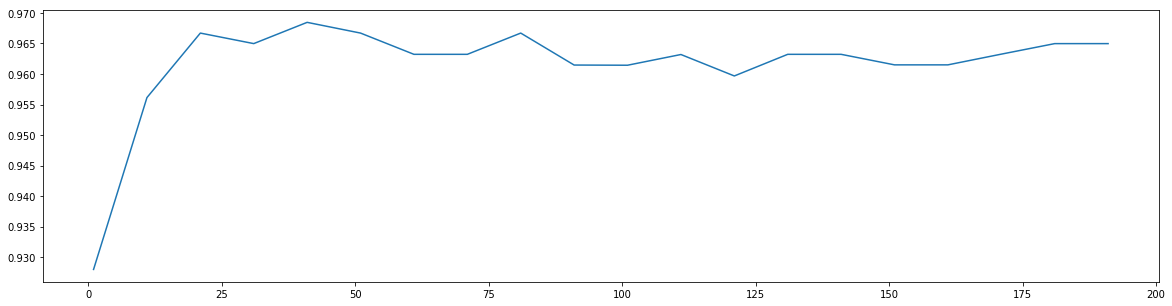

In [13]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,random_state=90,n_jobs=-1)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)

print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

# list.index([object])
# 返回这个object在列表list中的索引

0.9719870797683866 44


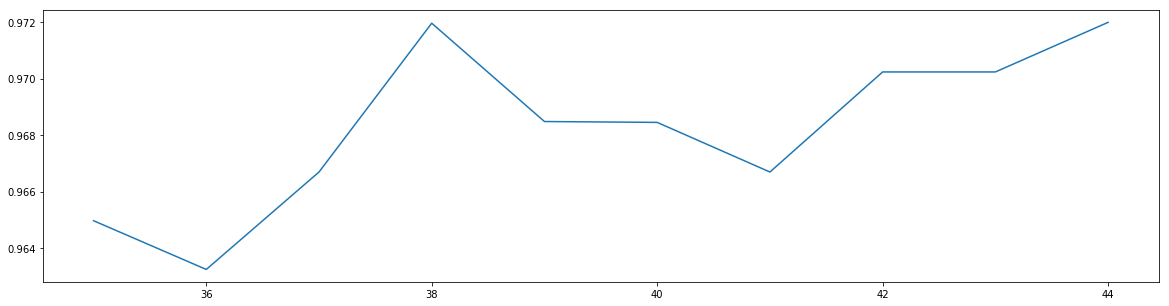

In [16]:
scorel = []
for i in range(35,45):
    rfc = RandomForestClassifier(n_estimators=i+1,random_state=90,n_jobs=-1)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)

print(max(scorel),([*range(35,45)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(35,45),scorel)
plt.show()

In [17]:
 # 调整max_depth

param_grid = {"max_depth":np.arange(1,20,1)}

rfc = RandomForestClassifier(n_estimators=44,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=44, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [18]:
GS.best_params_  # 显示调整出来的最大深度

{'max_depth': 11}

In [20]:
GS.best_score_  # 返回调整好的最佳参数对应的准确率

0.9701230228471002

In [21]:
# 以上调整max_depth使得模型复杂的向左移动，泛化误差上升，在最低点的左边，故不可行
# 下面调整max_features,尝试一下增大特征，增加模型的复杂度
# 其中max_features 是最大特征树开平方
# 调整max_features
param_grid = {"max_features":np.arange(5,30,1)}

rfc = RandomForestClassifier(n_estimators=44,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=44, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
GS.best_params_

{'max_features': 5}

In [23]:
GS.best_score_

0.9701230228471002

In [24]:
# 调整min_samples_leaf
param_grid = {"min_samples_leaf":np.arange(1,1+10,1)}

rfc = RandomForestClassifier(n_estimators=44,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=44, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
GS.best_params_

{'min_samples_leaf': 1}

In [27]:
GS.best_score_

0.9701230228471002

In [28]:
# 调整min_samples_split
param_grid = {"min_samples_split":np.arange(2,2+20,1)}

rfc = RandomForestClassifier(n_estimators=44,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=44, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
GS.best_params_

{'min_samples_split': 2}

In [30]:
GS.best_score_

0.9701230228471002

In [31]:
# 调整criterion
param_grid = {"criterion":['gini','entropy']}

rfc = RandomForestClassifier(n_estimators=44,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=44, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
GS.best_params_   # 默认是gini

{'criterion': 'gini'}

In [33]:
GS.best_score_

0.9701230228471002

In [35]:
rfc = RandomForestClassifier(n_estimators=44,random_state=90)
score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score
score - score_pre

0.0035401002506266765